# Title:  **Prediction of Hepatitis**
## Author: **Kaleem u Allah**

### **About Dataset**

**Attribute information:**

1. target: DIE (1), LIVE (2)
2. age: 10, 20, 30, 40, 50, 60, 70, 80
3. gender: male (1), female (2)

`    ------ no = 2,   yes = 1 ------`

4. steroid: no, yes
5. antivirals: no, yes
6. fatique: no, yes
7. malaise: no, yes
8. anorexia: no, yes
9. liverBig: no, yes
10. liverFirm: no, yes
11. spleen: no, yes
12. spiders: no, yes
13. ascites: no, yes
14. varices: no, yes
15. histology: no, yes
    1.  bilirubin: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 --
    2.   alk: 33, 80, 120, 160, 200, 250 ---
    3.  sgot: 13, 100, 200, 300, 400, 500, ---
    4.  albu: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, ---
    5.  protime: 10, 20, 30, 40, 50, 60, 70, 80, 90, ---

`NA's are represented with "?"`

## **Import Libraries**

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Load Dataset**

In [38]:
# Load the dataset
df = pd.read_csv('hepatitis.csv', na_values="?")
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


## **Exploratory Data Analysis (EDA)**

In [39]:
# Exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime     88 non-null     f

In [40]:
# Check the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,155.0,78.000000,44.888751,1.0,39.50,78.0,116.50,155.0
target,155.0,1.793548,0.406070,1.0,2.00,2.0,2.00,2.0
age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
gender,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
steroid,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
fatigue,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
malaise,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
liverBig,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0


In [41]:
# Check the shape of the data
print("Shape of the data: ", df.shape)

Shape of the data:  (155, 21)


In [42]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)
df.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


<Axes: xlabel='age', ylabel='Count'>

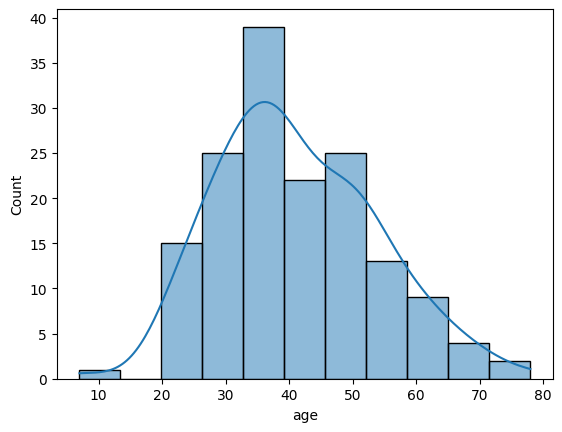

In [43]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

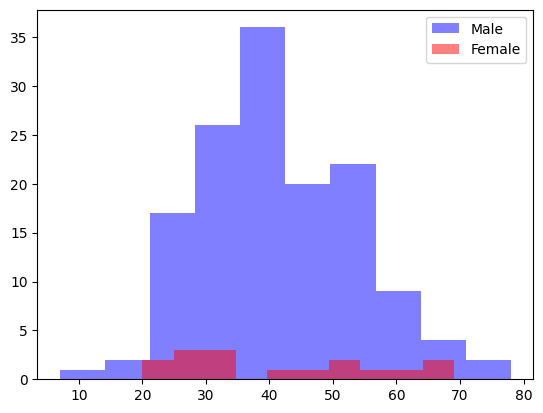

In [44]:
# plot the histogram of age column using matplotlib and coloring this by gender
plt.hist(df['age'][(df['gender']==1)], alpha=0.5, label='Male', color='blue')
plt.hist(df['age'][(df['gender']==2)], alpha=0.5, label='Female', color='red')
plt.legend()
plt.show()

<Axes: xlabel='target', ylabel='Count'>

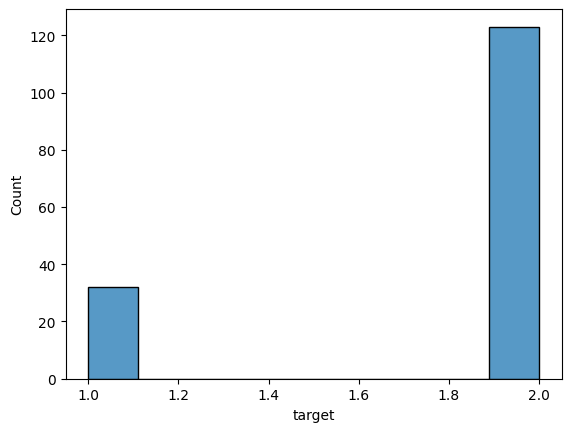

In [45]:
# draw a histogram to see the distribution of target column
sns.histplot(df['target'])

In [46]:
# find the values of gender column
df['gender'].value_counts()

gender
1    139
2     16
Name: count, dtype: int64

In [47]:
# find the values count of age column grouping by gender column
df.groupby('gender')['age'].value_counts()

gender  age
1       38     8
        36     7
        30     7
        51     6
        39     6
        34     6
        44     5
        37     5
        50     5
        42     5
        54     5
        45     4
        31     4
        28     4
        27     4
        23     4
        47     4
        32     4
        56     3
        61     3
        49     3
        52     3
        40     3
        33     3
        57     2
        41     2
        48     2
        35     2
        20     2
        25     2
        24     2
        7      1
        78     1
        72     1
        70     1
        66     1
        65     1
        64     1
        62     1
        60     1
        59     1
        58     1
        46     1
        43     1
        22     1
2       34     2
        41     1
        25     1
        26     1
        28     1
        30     1
        20     1
        67     1
        45     1
        50     1
        53     1
        62     1
        58     1
  

## **Dealing With Missing Values**

In [48]:
# Check the missing values
print("Missing values: ", df.isnull().sum().sort_values(ascending=False))

Missing values:  protime       67
alk           29
albu          16
liverFirm     11
liverBig      10
bili           6
spleen         5
spiders        5
ascites        5
varices        5
sgot           4
steroid        1
fatigue        1
malaise        1
anorexia       1
target         0
age            0
antivirals     0
gender         0
histology      0
dtype: int64


In [49]:
# Separate the columns into categorical and numerical
num_cols = ["target", "age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

In [50]:
# Impute missing values of num_cols and cat_cols by using imputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [51]:
# Concatenate num_cols and cat_cols
df = pd.concat([df[num_cols], df[cat_cols]], axis=1)

In [52]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

target        0
age           0
varices       0
ascites       0
spiders       0
spleen        0
liverFirm     0
liverBig      0
anorexia      0
malaise       0
fatigue       0
antivirals    0
steroid       0
gender        0
protime       0
albu          0
sgot          0
alk           0
bili          0
histology     0
dtype: int64

In [53]:
df.head()

,target,age,bili,alk,sgot,albu,protime,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,histology
0,2.0,30.0,1.0,85.0,18.0,4.0,61.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
1,2.0,50.0,0.9,135.0,42.0,3.5,61.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
2,2.0,78.0,0.7,96.0,32.0,4.0,61.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,2.0,31.0,0.7,46.0,52.0,4.0,80.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2.0,34.0,1.0,85.0,200.0,4.0,61.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


## **Machine Learning**

### **Model Training**

In [54]:
# Split the data into X and y column
X = df.drop('target', axis=1)
y = df['target']

In [55]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
# Split the resampled data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [57]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Model selection and hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

In [59]:
# Train the model
model= svm_best.fit(X_train, y_train)

In [60]:
# Predict the model
y_pred = svm_best.predict(X_test)

In [61]:
y_pred

array([2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1.])

## **Model Evaluation**

In [62]:
# Evaluate the model
print('Accuracy Score (SVM): ', accuracy_score(y_test, y_pred))
print('Recall Score (SVM): ', recall_score(y_test, y_pred))
print('Precision Score (SVM): ', precision_score(y_test, y_pred))
print('F1 Score (SVM): ', f1_score(y_test, y_pred))
print('Confusion Matrix (SVM): \n', confusion_matrix(y_test, y_pred))
print('Classification Report (SVM): \n', classification_report(y_test, y_pred))

Accuracy Score (SVM):  0.98
Recall Score (SVM):  1.0
Precision Score (SVM):  0.967741935483871
F1 Score (SVM):  0.9836065573770492
Confusion Matrix (SVM): 
 [[30  0]
 [ 1 19]]
Classification Report (SVM): 
               precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        30
         2.0       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [63]:
# RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [64]:
# Evaluate the RandomForestClassifier
print('\nAccuracy Score (Random Forest): ', accuracy_score(y_test, y_pred_rfc))
print('Recall Score (Random Forest): ', recall_score(y_test, y_pred_rfc))
print('Precision Score (Random Forest): ', precision_score(y_test, y_pred_rfc))
print('F1 Score (Random Forest): ', f1_score(y_test, y_pred_rfc))
print('Confusion Matrix (Random Forest): \n', confusion_matrix(y_test, y_pred_rfc))
print('Classification Report (Random Forest): \n', classification_report(y_test, y_pred_rfc))


Accuracy Score (Random Forest):  0.94
Recall Score (Random Forest):  0.9333333333333333
Precision Score (Random Forest):  0.9655172413793104
F1 Score (Random Forest):  0.9491525423728815
Confusion Matrix (Random Forest): 
 [[28  2]
 [ 1 19]]
Classification Report (Random Forest): 
               precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        30
         2.0       0.90      0.95      0.93        20

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



Text(95.72222222222221, 0.5, 'Actual')

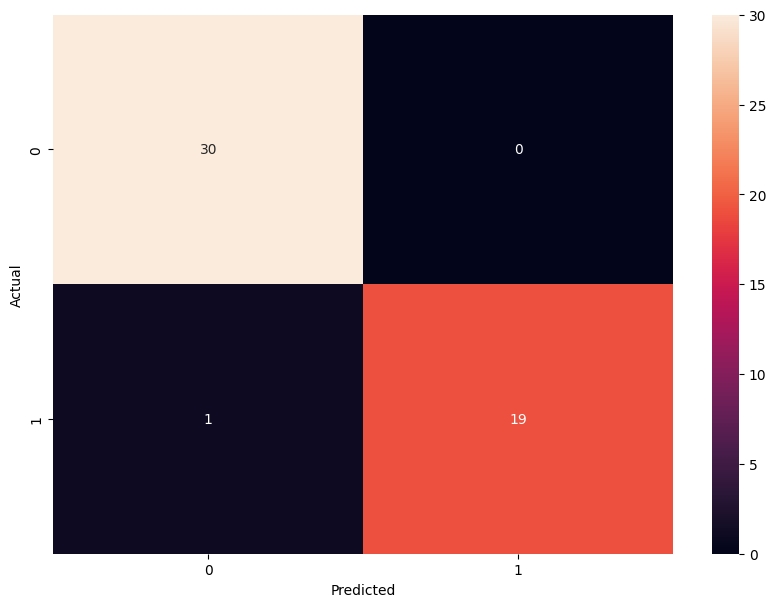

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [66]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/02_model_hapitits.pkl', 'wb'))